### Set env variable value from Google Colab secret


In [2]:
import os
from google.colab import userdata
GCP_PROJECT_ID = userdata.get('GCP_PROJECT_ID')

os.environ["GCP_PROJECT_ID"] = GCP_PROJECT_ID

### Login to GCP project

In [ ]:
!gcloud auth login --no-launch-browser
!gcloud config set project $GCP_PROJECT_ID

In [4]:
%%capture

!gsutil cp gs://virtual-home-studio/vhome_medium_ds/v0_t1680_images.tar.gz .
!tar -xzvf v0_t1680_images.tar.gz
!nvidia-smi

In [7]:
%%capture
!pip install cleanvision


Reading images from /content/images
Checking for dark, blurry, exact_duplicates, near_duplicates, low_information, light, grayscale, odd_aspect_ratio images ...


  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/1680 [00:00<?, ?it/s]

Issue checks completed. 714 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |          470 |
|  1 | exact_duplicates |          244 |
|  2 | blurry           |            0 |
|  3 | dark             |            0 |
|  4 | grayscale        |            0 |
|  5 | light            |            0 |
|  6 | low_information  |            0 |
|  7 | odd_aspect_ratio |            0 | 

------------------ near_duplicates images ------------------

Number of examples with this issue: 470
Examples representing most severe instances of this issue:

Set: 0


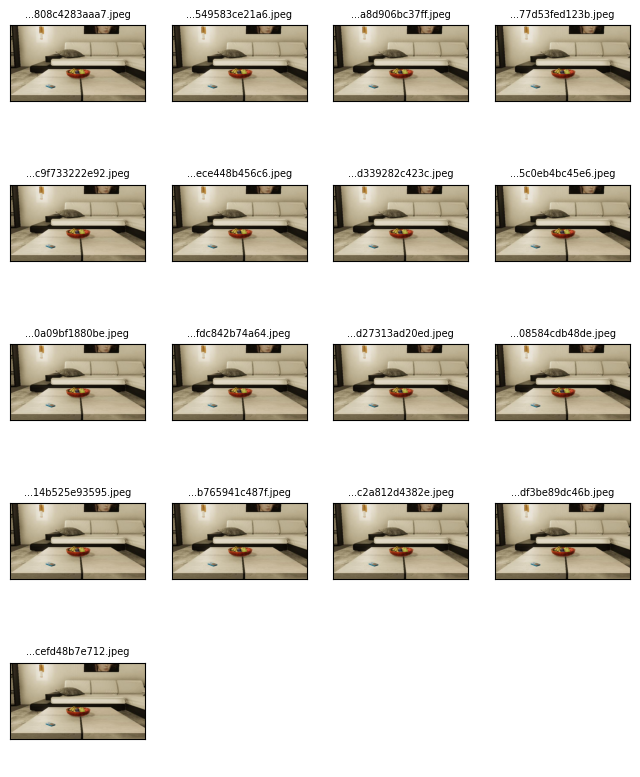

Set: 1


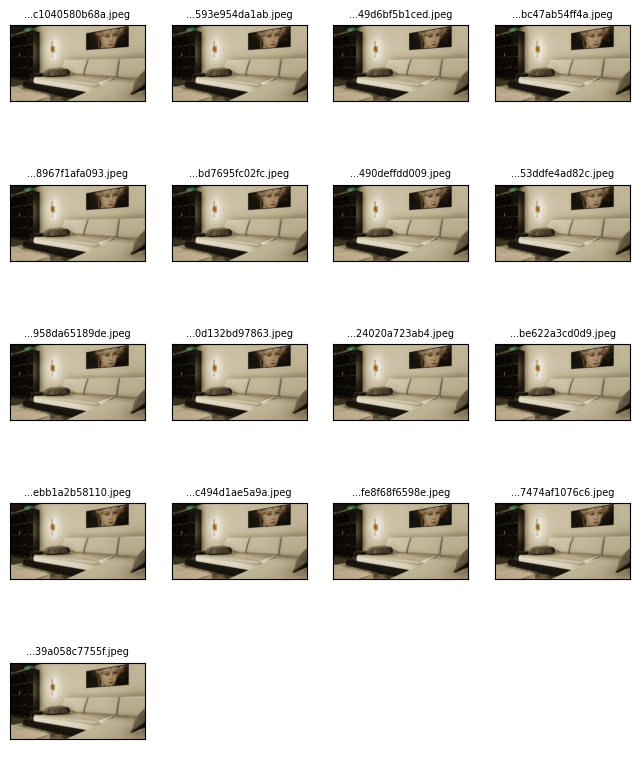

Set: 2


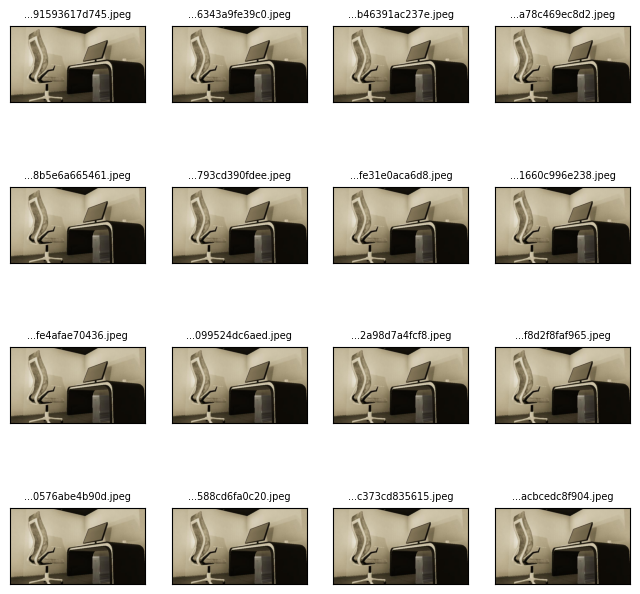

Set: 3


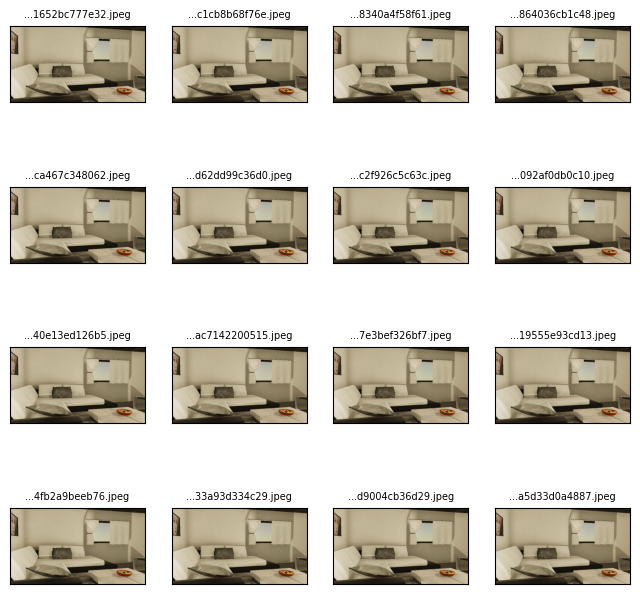

----------------- exact_duplicates images ------------------

Number of examples with this issue: 244
Examples representing most severe instances of this issue:

Set: 0


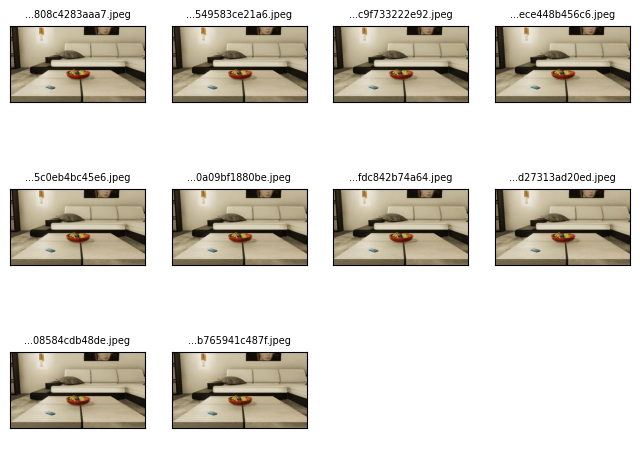

Set: 1


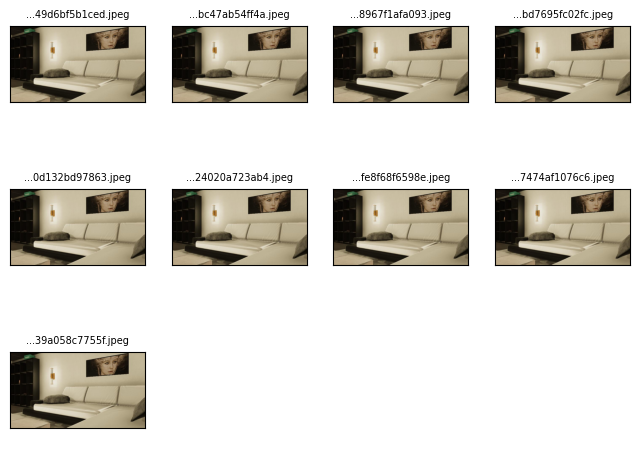

Set: 2


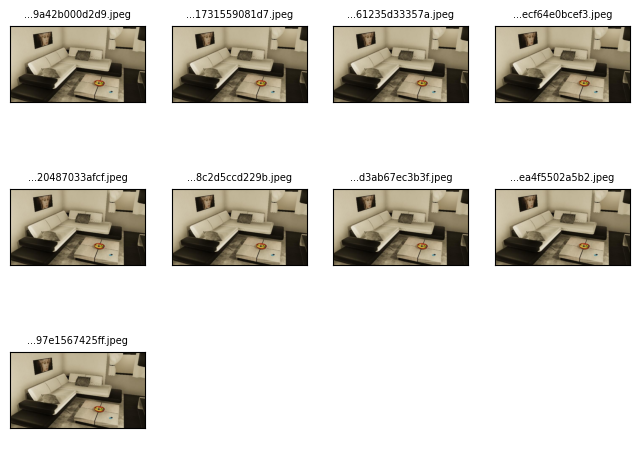

Set: 3


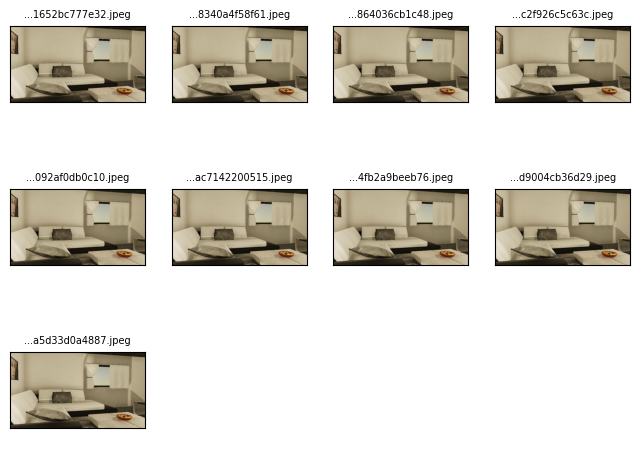

In [8]:
from cleanvision import Imagelab

# Specify path to folder containing the image files in your dataset
imagelab = Imagelab(data_path="./images")

issue_types = {"dark": {}, "blurry": {}, "exact_duplicates": {},
               "near_duplicates": {"hash_type": "phash"}, "low_information": {}, "light": {},
               "grayscale": {}, "odd_aspect_ratio": {}}

imagelab.find_issues(issue_types=issue_types)

# Produce a report with only the specified issue_types
imagelab.report(issue_types=issue_types)

Summary of all issues checks
 |    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | near_duplicates  |          470 |
|  1 | exact_duplicates |          244 |
|  2 | blurry           |            0 |
|  3 | dark             |            0 |
|  4 | grayscale        |            0 |
|  5 | light            |            0 |
|  6 | low_information  |            0 |
|  7 | odd_aspect_ratio |            0 |
Set: 0


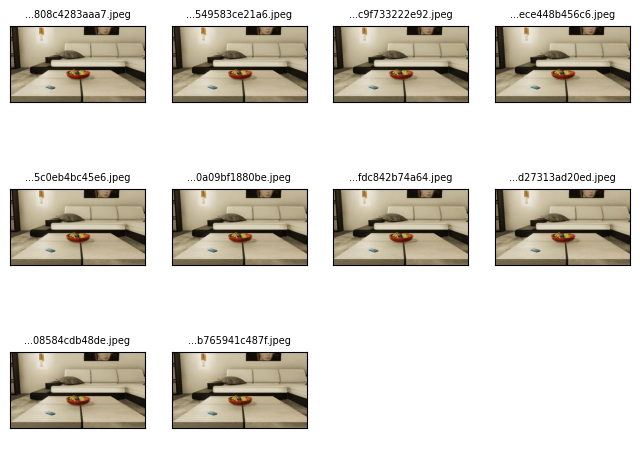

Set: 1


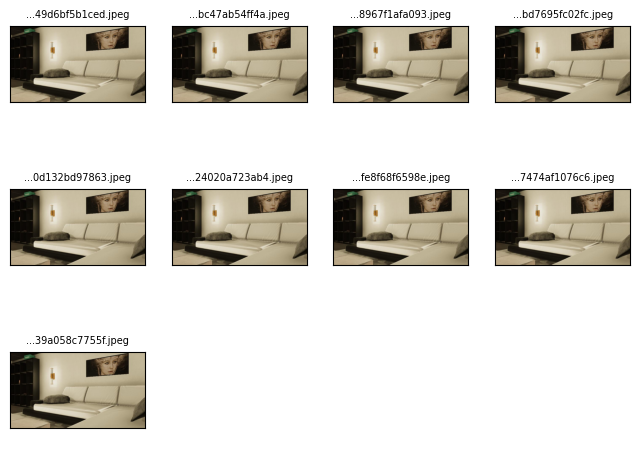

Set: 2


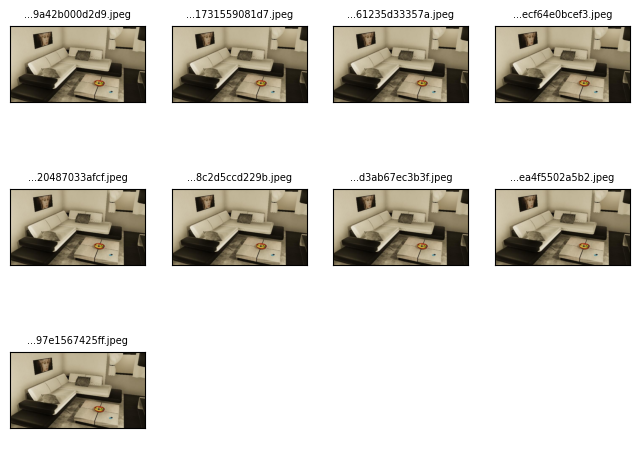

Set: 3


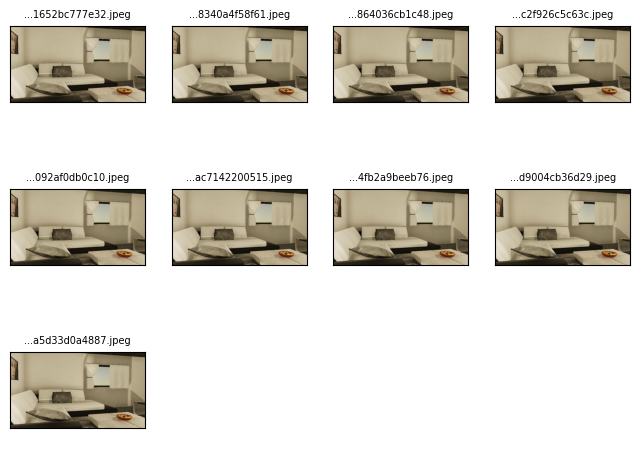

Set: 4


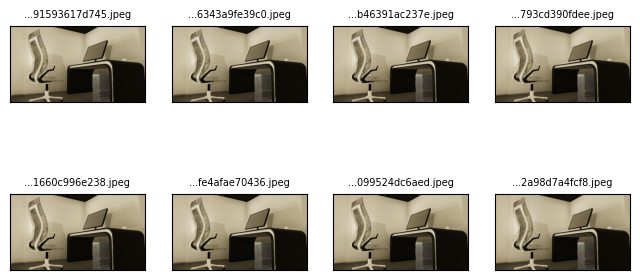

Set: 5


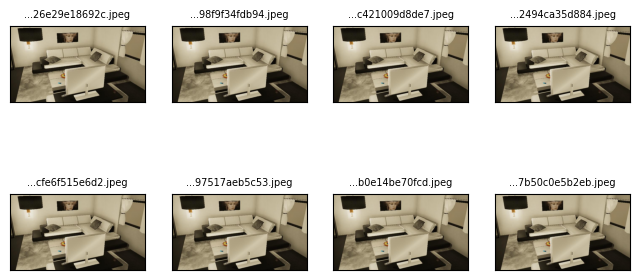

Set: 6


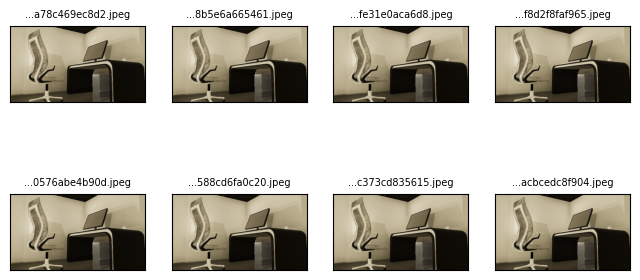

Set: 7


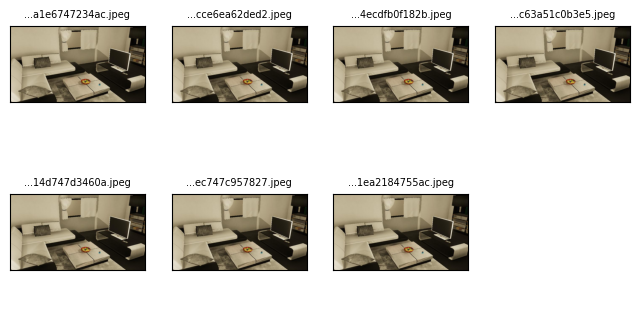

In [27]:
print("Summary of all issues checks\n", imagelab.issue_summary.to_markdown())
imagelab.visualize(
    issue_types=["exact_duplicates"], num_images=8
)  # visualize images that have specific issues


Set: 0


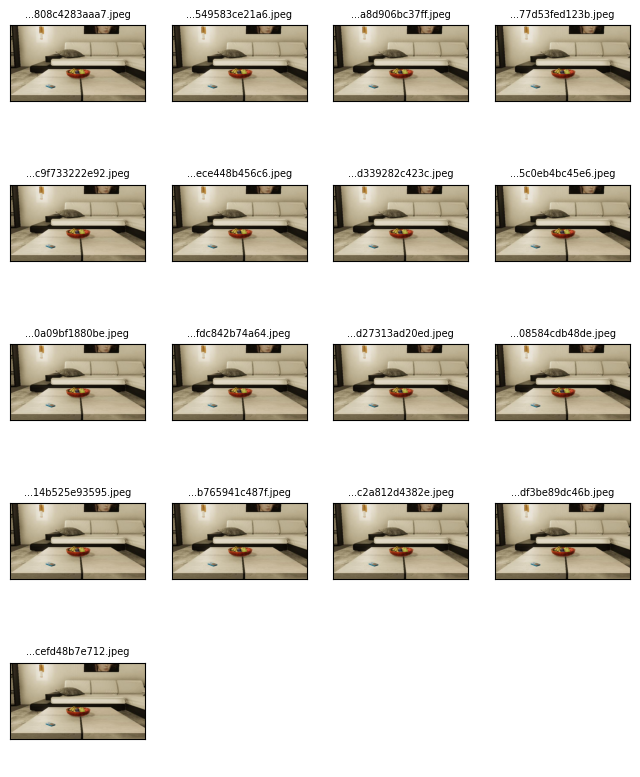

Set: 1


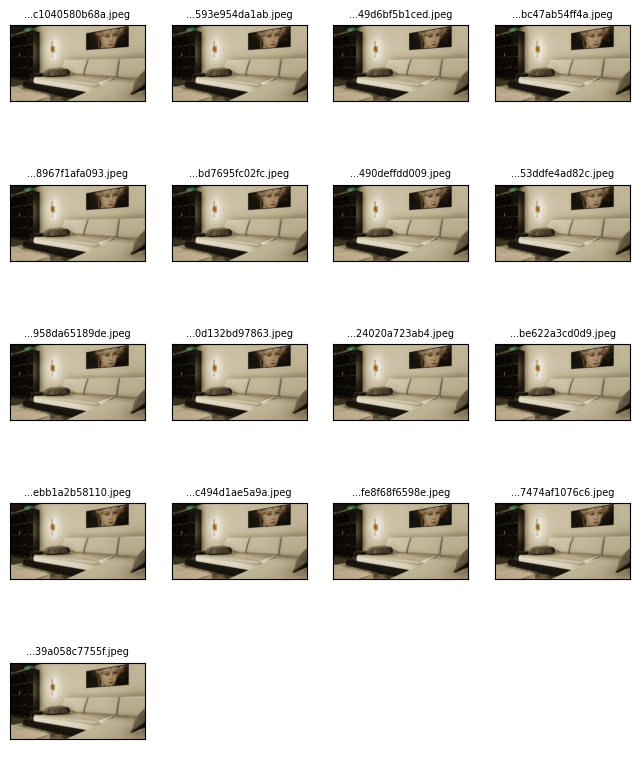

Set: 2


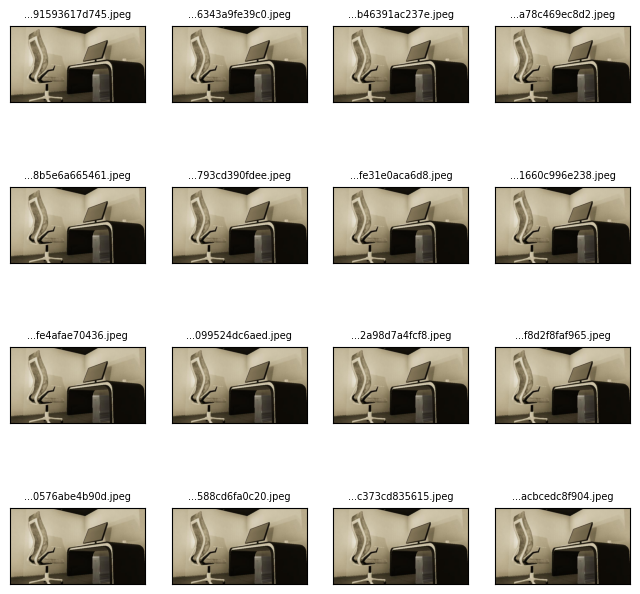

Set: 3


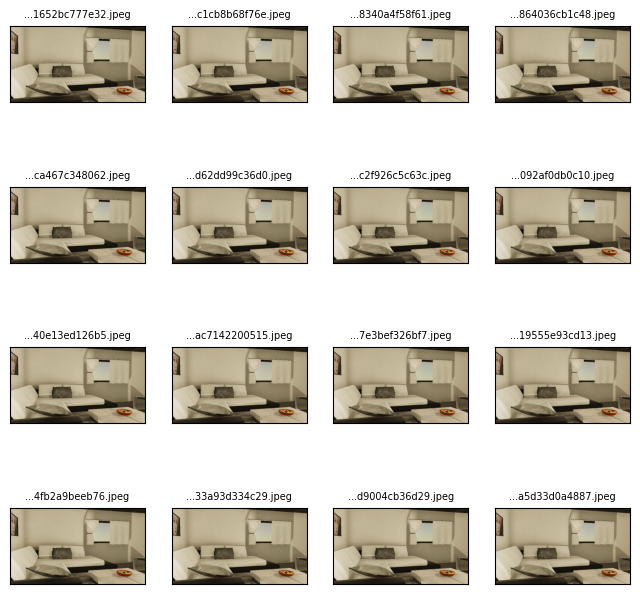

Set: 4


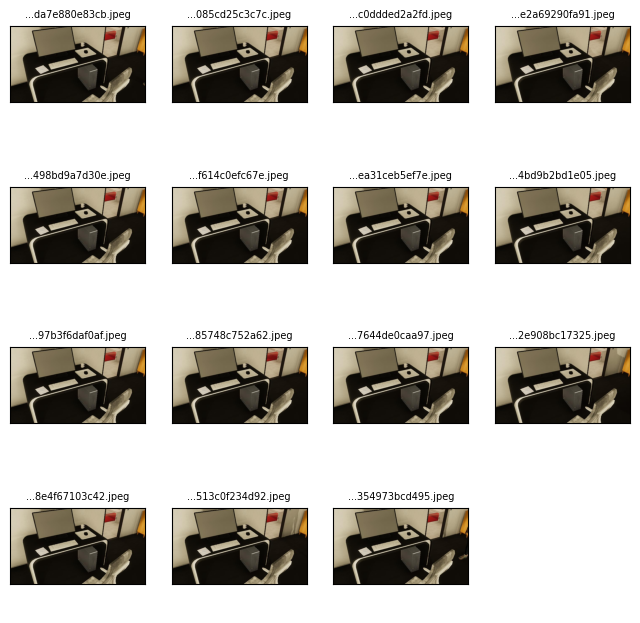

Set: 5


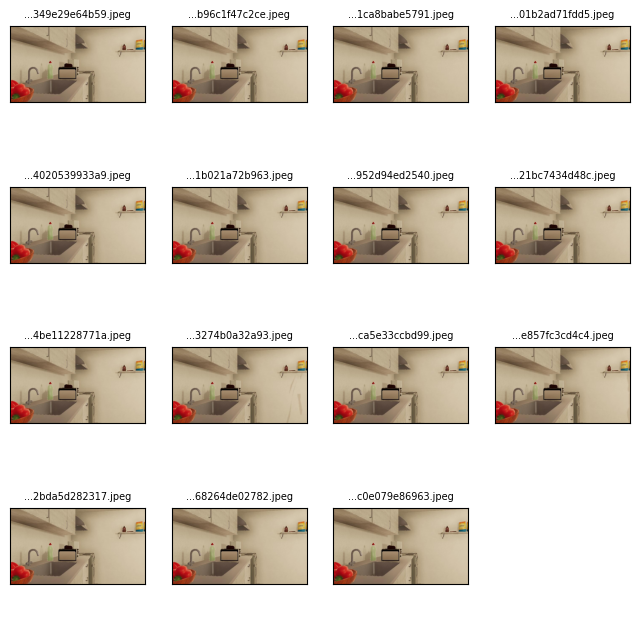

Set: 6


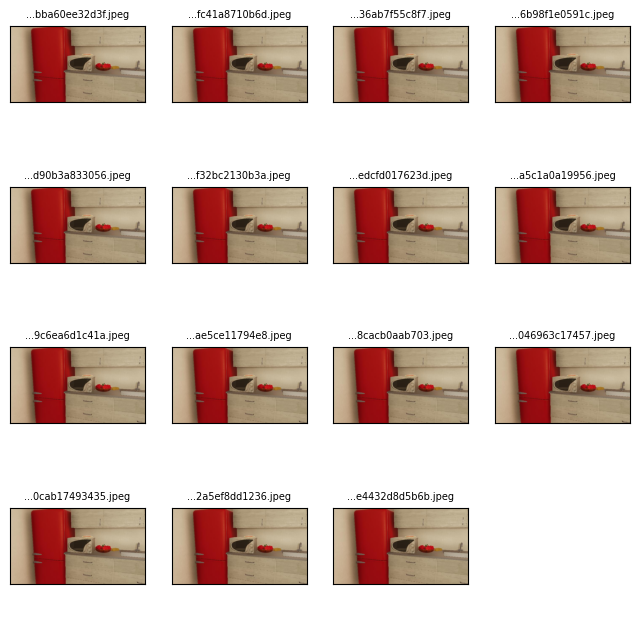

Set: 7


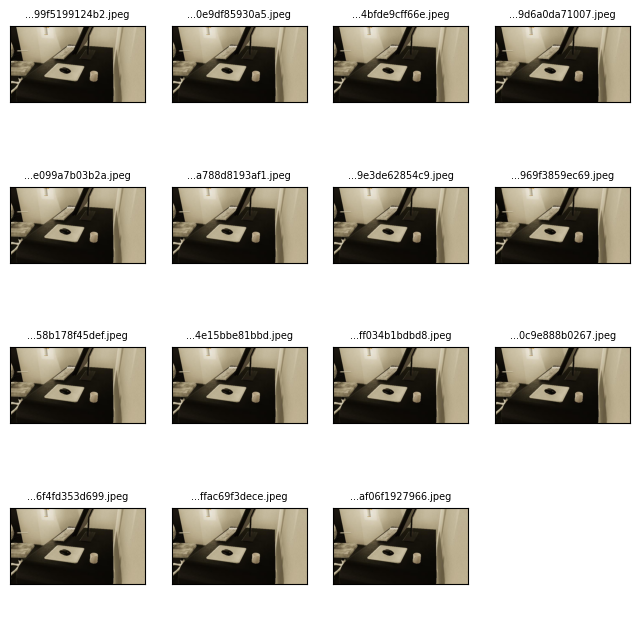

In [17]:
imagelab.visualize(
    issue_types=["exact_duplicates"], num_images=8
)  # visualize images that have specific issues

In [19]:
issue_types = {"near_duplicates": {}}

near_dupilcate_images = imagelab.find_issues(issue_types=issue_types)
near_dupilcate_images

Checking for near_duplicates images ...


  0%|          | 0/1680 [00:00<?, ?it/s]

Issue checks completed. 714 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


In [20]:
# Miscellaneous extra information about dataset and its issues
print(list(imagelab.info.keys()), "\n")
print(list(imagelab.info["statistics"].keys()))
print(imagelab.info["statistics"]["brightness"][:10])

['statistics', 'dark', 'blurry', 'low_information', 'light', 'grayscale', 'odd_aspect_ratio', 'exact_duplicates', 'near_duplicates'] 

['brightness', 'blurriness', 'entropy', 'color_space', 'aspect_ratio']
count    1680.000000
mean        0.476812
std         0.129989
min         0.105835
25%         0.388341
50%         0.502936
75%         0.582031
max         0.705121
Name: brightness, dtype: float64


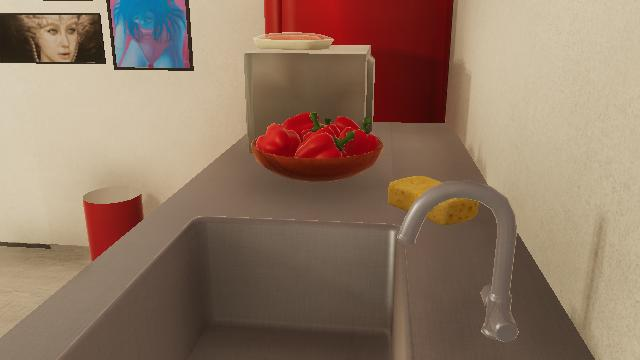

In [25]:
from IPython.display import Image
Image('./images/imageid_bcbf0abdc3554088829803cd3a5451a1.jpeg')

In [26]:
import os, glob
from PIL import Image

def get_skin_ratio(im):
    im = im.crop((int(im.size[0]*0.2), int(im.size[1]*0.2), im.size[0]-int(im.size[0]*0.2), im.size[1]-int(im.size[1]*0.2)))
    skin = sum([count for count, rgb in im.getcolors(im.size[0]*im.size[1]) if rgb[0]>60 and rgb[1]<(rgb[0]*0.85) and rgb[2]<(rgb[0]*0.7) and rgb[1]>(rgb[0]*0.4) and rgb[2]>(rgb[0]*0.2)])
    return float(skin)/float(im.size[0]*im.size[1])

for image_dir in (['./images']):

    for image_file in glob.glob(os.path.join(image_dir,"*.jpeg")):
        skin_percent = get_skin_ratio(Image.open(image_file)) * 100
        if skin_percent>10.0:
            print ("Image contains high skin ratio {0} has {1:.0f}% skin".format(image_file, skin_percent))
        # else:
            # print ("CLEAN {0} has {1:.0f}% skin".format(image_file, skin_percent))

Image contains high skin ratio ./images/imageid_395c33da6e104ee19f7a426aab2c1ce2.jpeg has 15% skin
Image contains high skin ratio ./images/imageid_aa28b039323b4fd68e901fcb87b886f7.jpeg has 18% skin
Image contains high skin ratio ./images/imageid_836910ec1a4e4eb888932901c18f84a9.jpeg has 21% skin
Image contains high skin ratio ./images/imageid_c47162618fb241ce9e505b5ad8bfa189.jpeg has 19% skin
Image contains high skin ratio ./images/imageid_677e72390e144c8cb496dba02b39555c.jpeg has 13% skin
Image contains high skin ratio ./images/imageid_42d746135c7a4c659e02d67eee9c156b.jpeg has 24% skin
Image contains high skin ratio ./images/imageid_b9f496f1053e4ff3919b987b15cfb7eb.jpeg has 16% skin
Image contains high skin ratio ./images/imageid_439165443b5c4574bf571b021a72b963.jpeg has 17% skin
Image contains high skin ratio ./images/imageid_8fdc5b18fcf74929b86845f0a1ad9e65.jpeg has 12% skin
Image contains high skin ratio ./images/imageid_dca43535f05c4d1db7146dc11168d3a8.jpeg has 17% skin
Image cont